In [1]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install("Biostrings")
BiocManager::install("ggplot2")
library(Biostrings)
library(ggplot2)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.1 (2023-06-16 ucrt)

Installing package(s) 'Biostrings'



package 'Biostrings' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Biostrings'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Program Files\R\R-4.3.1\library\00LOCK\Biostrings\libs\x64\Biostrings.dll to C:\Program Files\R\R-4.3.1\library\Biostrings\libs\x64\Biostrings.dll: Permission denied"
Warning message:
"restored 'Biostrings'"



The downloaded binary packages are in
	C:\Users\harih\AppData\Local\Temp\RtmpCeOj8Z\downloaded_packages


Old packages: 'abind', 'ape', 'aplot', 'askpass', 'backports', 'BiocManager',
  'Biostrings', 'bit', 'bit64', 'bitops', 'boot', 'brio', 'broom', 'bslib',
  'cachem', 'callr', 'car', 'cli', 'cluster', 'codetools', 'colorspace',
  'commonmark', 'corrplot', 'cpp11', 'crayon', 'credentials', 'curl',
  'data.table', 'DBI', 'dbplyr', 'digest', 'downlit', 'e1071', 'evaluate',
  'farver', 'fastmap', 'fontawesome', 'foreign', 'fs', 'GenomeInfoDb', 'gert',
  'ggfun', 'ggpattern', 'ggrepel', 'ggsci', 'ggtree', 'gh', 'glue',
  'gridpattern', 'gtable', 'highr', 'htmltools', 'httpuv', 'httr2', 'igraph',
  'jsonlite', 'KernSmooth', 'knitr', 'later', 'lattice', 'lintr', 'lme4',
  'lubridate', 'mgcv', 'minqa', 'munsell', 'nlme', 'nloptr', 'openssl',
  'openxlsx', 'patchwork', 'pbdZMQ', 'pbkrtest', 'pixmap', 'pkgbuild',
  'pkgdown', 'pkgload', 'processx', 'profvis', 'promises', 'ps', 'quantreg',
  'R.oo', 'ragg', 'Rcpp', 'RcppArmadillo', 'RcppEigen', 'RCurl', 'remotes',
  'repr', 'reprex', 'rlang', 'rma

In [2]:
rarefaction_curve <- function(fasta_file, num_repeats) {
  sequences <- readDNAStringSet(fasta_file)
  num_sequences <- length(sequences)
  num_repeats <- 100
  all_unique_counts <- matrix(0, nrow = num_repeats, ncol = num_sequences)

  for (repeat_idx in 1:num_repeats) {
  set.seed(repeat_idx)  
  randomized_seq <- sample(sequences)

  unique_sequences <- character(0)
  for (i in seq_along(randomized_seq)) {
    unique_sequences <- unique(c(unique_sequences, as.character(randomized_seq[i])))
    all_unique_counts[repeat_idx, i] <- length(unique_sequences)
  }
  }

  average_unique_counts <- colMeans(all_unique_counts)
  std_dev_unique_counts <- apply(all_unique_counts, 2, sd) 
  rarefaction_data <- data.frame(
  num_sequences_analyzed = 1:num_sequences,
  num_unique_sequences = average_unique_counts,
  lower_bound = average_unique_counts - std_dev_unique_counts,
  upper_bound = average_unique_counts + std_dev_unique_counts
  )

  ggplot(rarefaction_data, aes(x = num_sequences_analyzed, y = num_unique_sequences)) +
  geom_line() +
  geom_ribbon(aes(ymin = lower_bound, ymax = upper_bound), alpha = 0.2) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed", color = "red") +
  labs(
    title = "Rarefaction Curve on proviral sequences",
    x = "Number of Sequences Analyzed",
    y = "Number of Unique Sequences"
  ) +
  theme_bw() +
  theme(axis.text = element_text(size = 14), axis.title = element_text(size = 14))
}


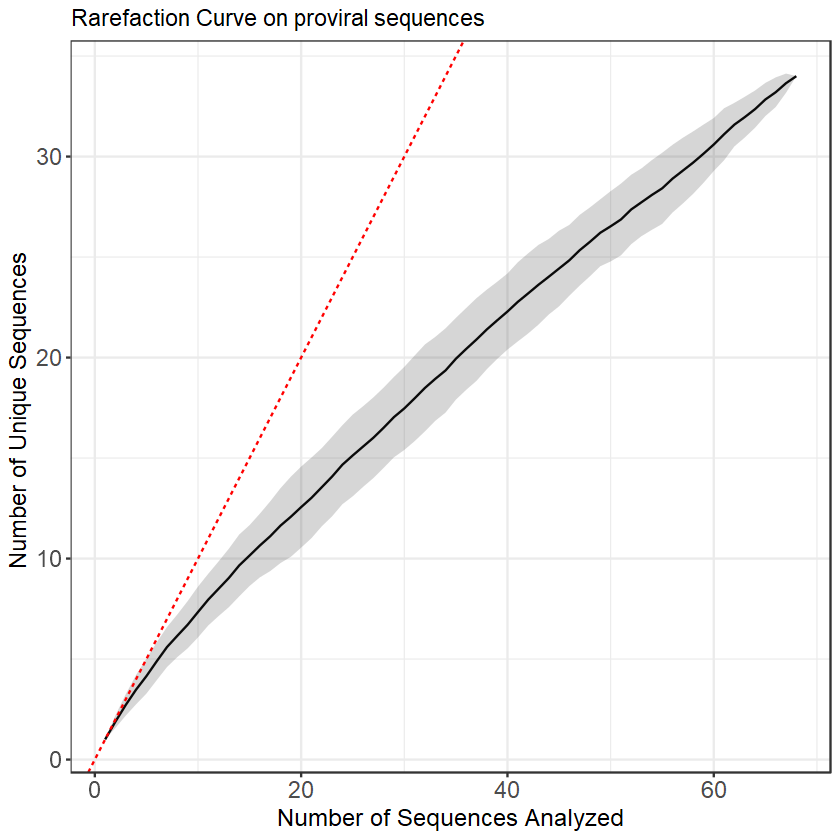

In [3]:
fasta_file <- #FASTAHereAgain 
num_repeats <- 100
rarefaction_curve(fasta_file, num_repeats)